# Vortal data

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
from pydmd import DMD, HODMD,  CDMD, SpDMD, RDMD, HAVOK, BOPDMD
from pydmd.plotter import plot_summary, plot_eigs, plot_modes_2D
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Generate synthetic data similar to your specifications
np.random.seed(42)
n_snapshots = 151
spatial_dim = 89351  # This will be reshaped to (449, 199) for visualization

def generate_synthetic_data():

    from scipy import io
    data = io.loadmat('../dataset/VORTALL.mat')
    X = data['VORTALL']
    X = X[:,:]
    return np.array(X)  # Shape: (89351, 151)



# Generate data
X = generate_synthetic_data()
print(f"Data shape: {X.shape}")

# Time vector
time = np.linspace(0, 4*np.pi, n_snapshots)

def reshape_for_plot(data_vector):
    """Reshape flattened data back to 2D for visualization"""
    return np.real(data_vector.reshape(449, 199)) 
t = X[0,:]

Data shape: (89351, 151)


1. Performing Standard DMD...
2. Performing Higher Order DMD...
4. Performing Compressed DMD...
5. Performing Sparsity-Promoting DMD...
ADMM: 3459 iterations
6. Performing Randomized DMD...


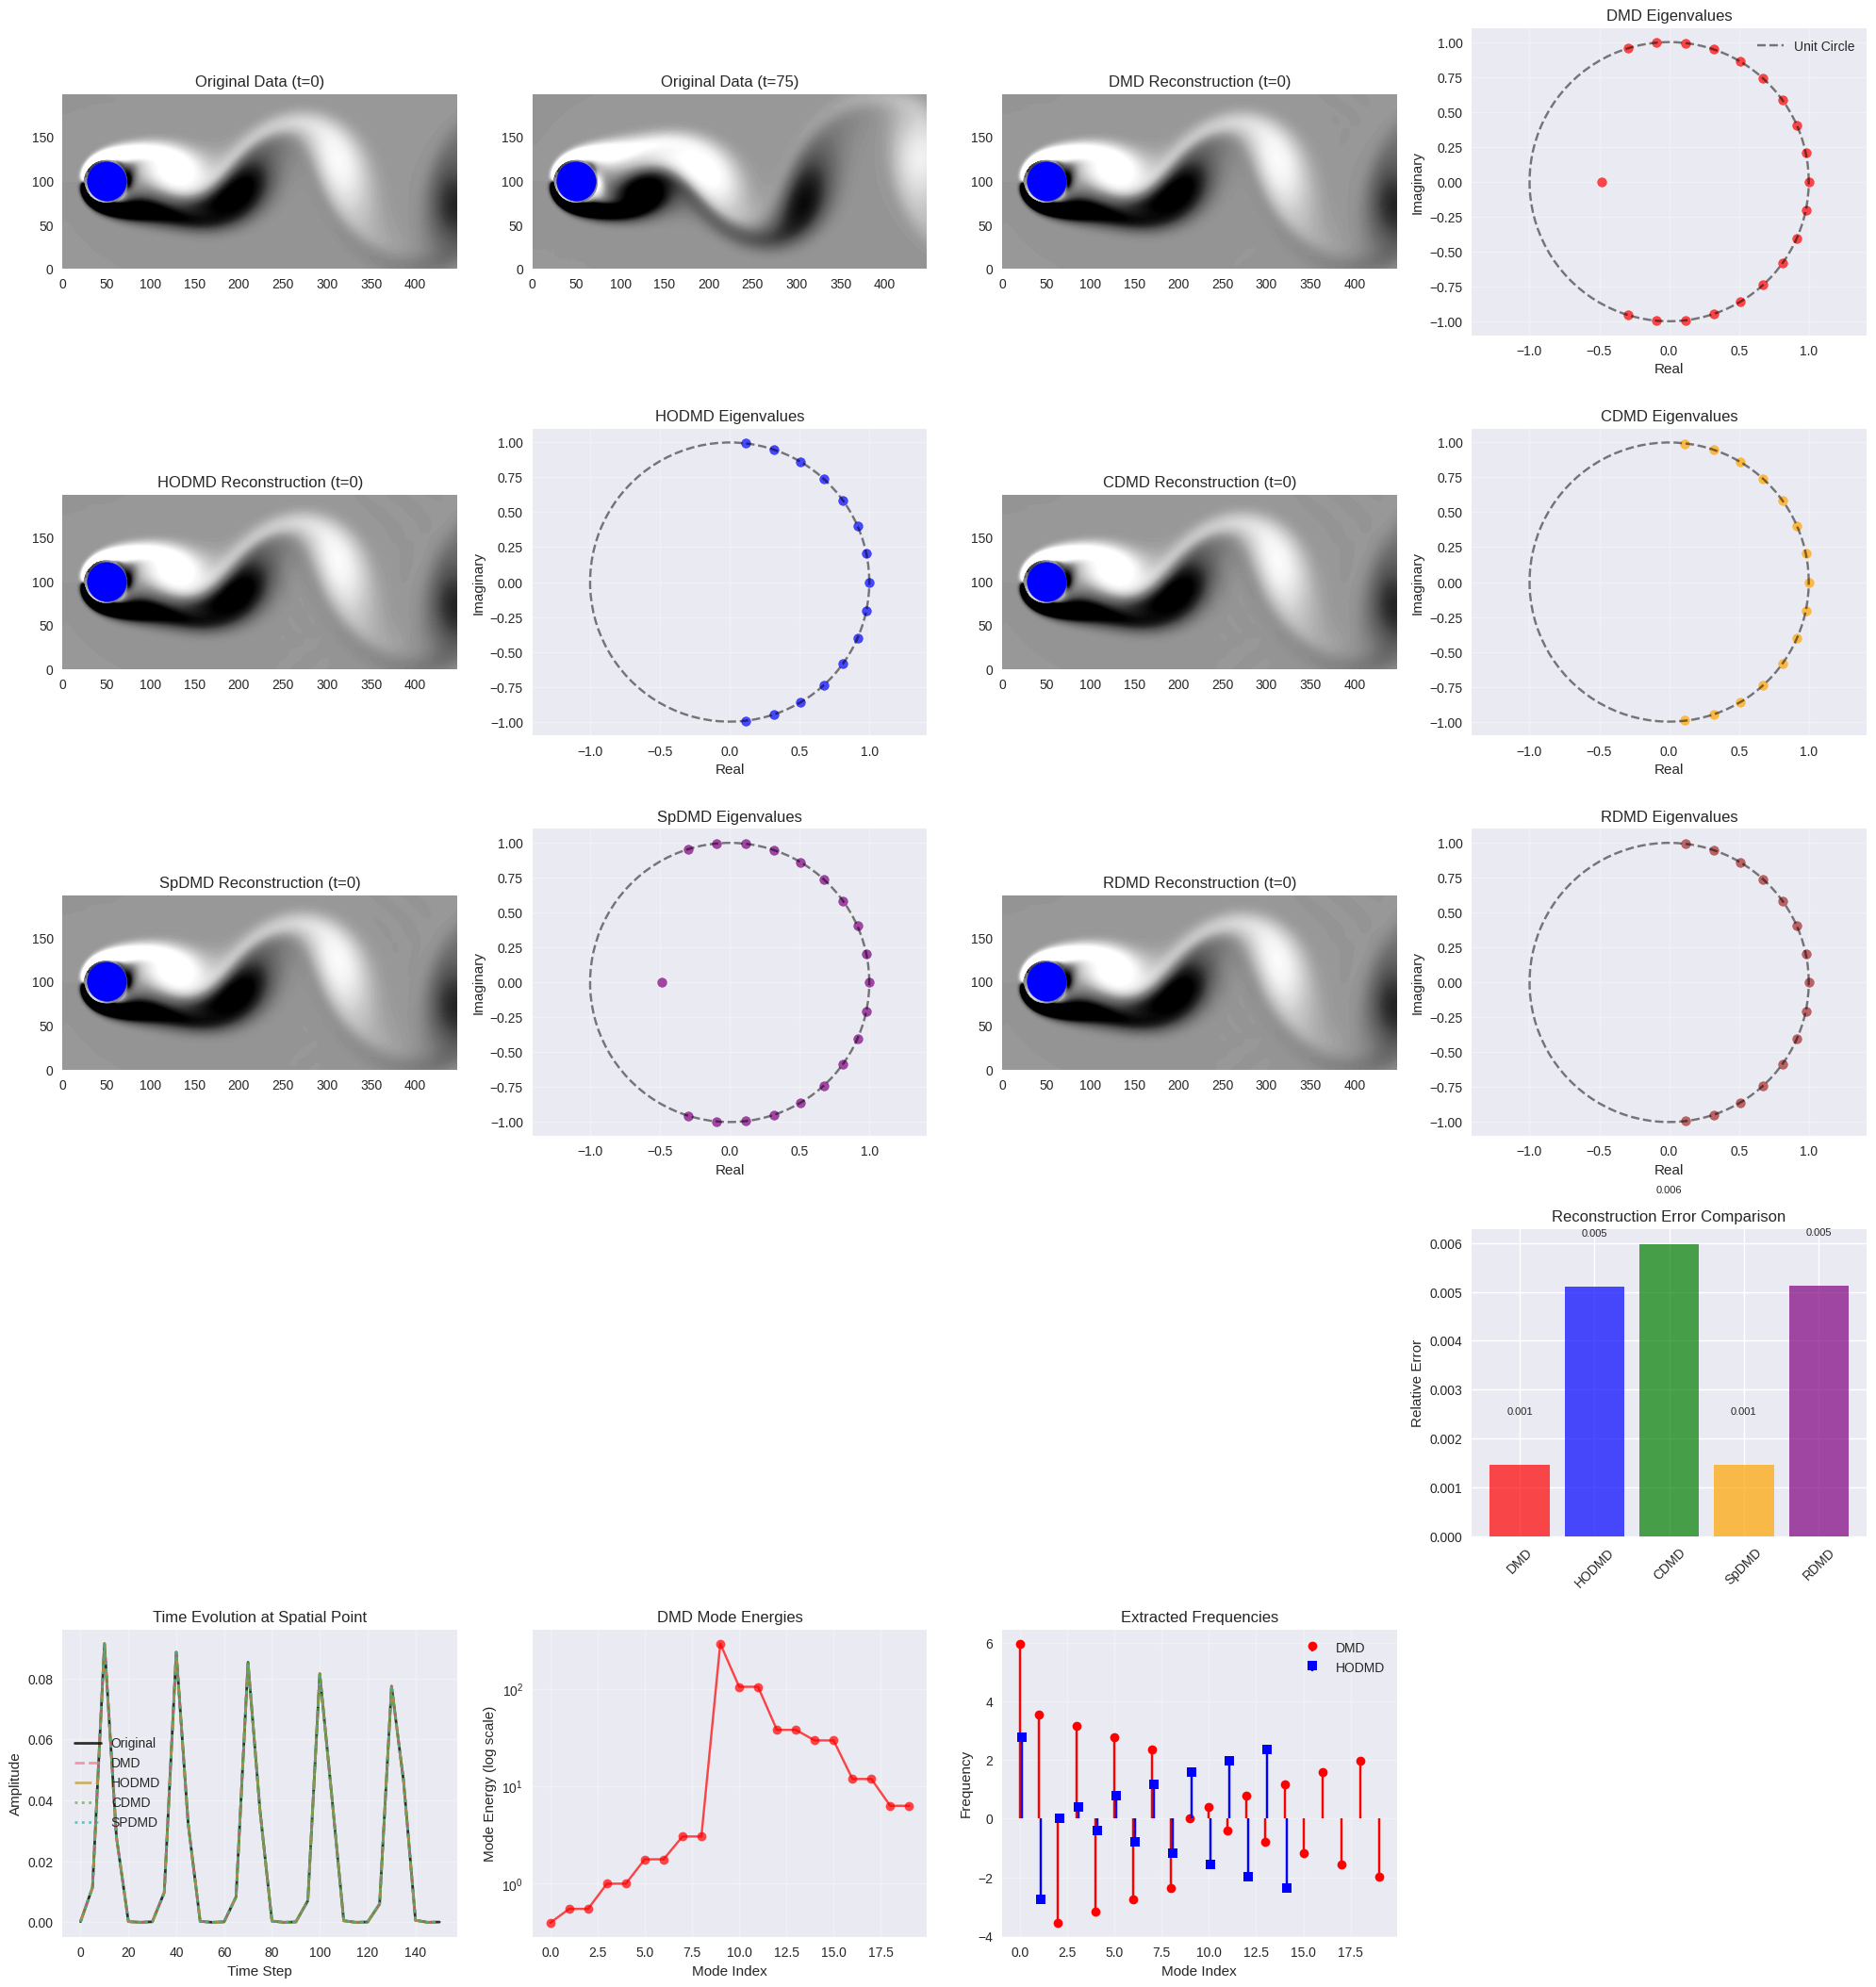

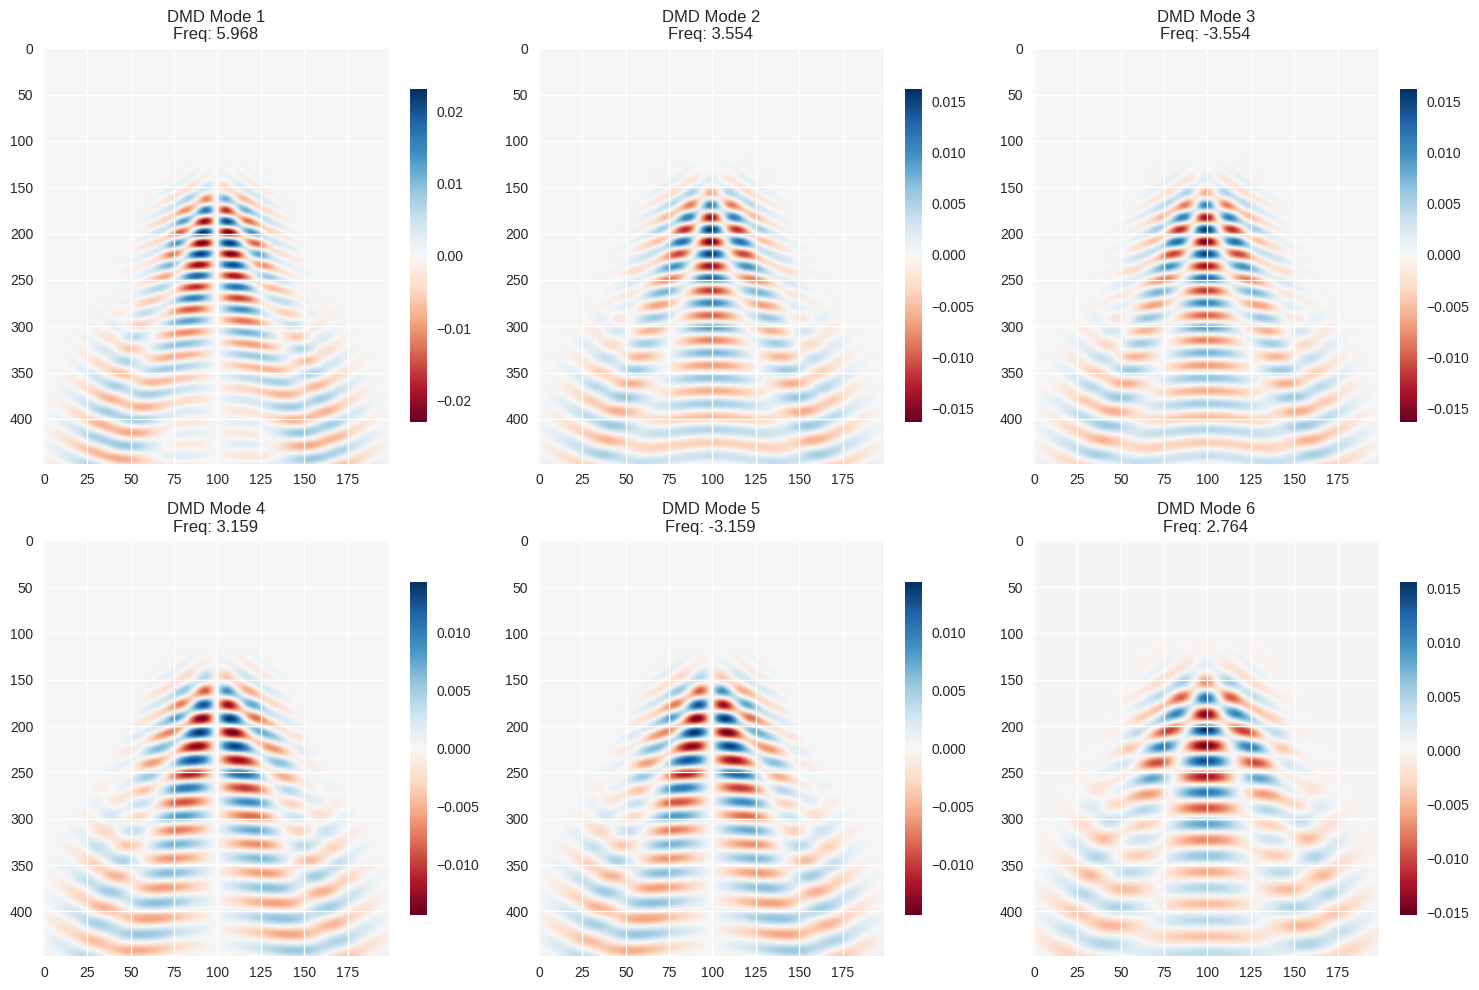


DMD ANALYSIS SUMMARY
Data shape: (89351, 151)
Time steps: 151
Spatial dimension: 89351
Reshaped spatial grid: 449 x 199

Reconstruction Errors:
DMD     : 0.001461
HODMD   : 0.005104
CDMD    : 0.005980
SpDMD   : 0.001462
RDMD    : 0.005117

Number of modes extracted:
DMD    : 20
HODMD  : 15
CDMD   : 15
SpDMD  : 20
RDMD   : 15

PyDMD Analysis Complete!


In [31]:

# Create figure for comprehensive analysis
fig = plt.figure(figsize=(20, 25))

# =============================================================================
# 1. STANDARD DMD
# =============================================================================
print("1. Performing Standard DMD...")
dmd = DMD(svd_rank=20)
dmd.fit(X)

# Plot original data samples
ax1 = plt.subplot(6, 4, 1)
ax1.contourf(np.real(np.reshape(X[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax1.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax1.set_aspect('equal')
plt.title('Original Data (t=0)')
plt.colorbar(im1, shrink=0.8)

ax2 = plt.subplot(6, 4, 2)
ax = ax2
ax.contourf(np.real(np.reshape(X[:,75],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
# im2 = plt.imshow(reshape_for_plot(X[:, 75]), cmap='RdBu', aspect='auto')
plt.title('Original Data (t=75)')
plt.colorbar(im2, shrink=0.8)

# DMD reconstruction
X_dmd = dmd.reconstructed_data
ax3 = plt.subplot(6, 4, 3)
ax = ax3
ax.contourf(np.real(np.reshape(X_dmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
# im3 = plt.imshow(reshape_for_plot(X_dmd[:, 0]), cmap='RdBu', aspect='auto')
plt.title('DMD Reconstruction (t=0)')
plt.colorbar(im3, shrink=0.8)

ax4 = plt.subplot(6, 4, 4)
# Plot DMD eigenvalues
theta = np.linspace(0, 2*np.pi, 100)
unit_circle = np.exp(1j * theta)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5, label='Unit Circle')
plt.scatter(np.real(dmd.eigs), np.imag(dmd.eigs), c='red', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('DMD Eigenvalues')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# =============================================================================
# 2. HIGHER ORDER DMD (HODMD)
# =============================================================================
print("2. Performing Higher Order DMD...")
hodmd = HODMD(svd_rank=15, d=5)
hodmd.fit(X)

ax5 = plt.subplot(6, 4, 5)
X_hodmd = hodmd.reconstructed_data
ax = ax5
ax.contourf(np.real(np.reshape(X_hodmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
# im5 = plt.imshow(reshape_for_plot(X_hodmd[:, 0]), cmap='RdBu', aspect='auto')
plt.title('HODMD Reconstruction (t=0)')
plt.colorbar(im5, shrink=0.8)

ax6 = plt.subplot(6, 4, 6)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(hodmd.eigs), np.imag(hodmd.eigs), c='blue', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('HODMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')



# =============================================================================
# 4. COMPRESSED DMD (CDMD)
# =============================================================================
print("4. Performing Compressed DMD...")
cdmd = CDMD(svd_rank=15, compression_matrix='sparse')
cdmd.fit(X)

ax9 = plt.subplot(6, 4, 7)
X_cdmd = cdmd.reconstructed_data
# im9 = plt.imshow(reshape_for_plot(X_cdmd[:, 0]), cmap='RdBu', aspect='auto')
ax = ax9
ax.contourf(np.real(np.reshape(X_cdmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
plt.title('CDMD Reconstruction (t=0)')
plt.colorbar(im9, shrink=0.8)

ax10 = plt.subplot(6, 4, 8)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(cdmd.eigs), np.imag(cdmd.eigs), c='orange', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('CDMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# =============================================================================
# 5. SPARSITY-PROMOTING DMD (SpDMD)
# =============================================================================
print("5. Performing Sparsity-Promoting DMD...")
spdmd = SpDMD(svd_rank=20, gamma=10, rho=1)
spdmd.fit(X)

ax11 = plt.subplot(6, 4, 9)
X_spdmd = spdmd.reconstructed_data
# im11 = plt.imshow(reshape_for_plot(X_spdmd[:, 0]), cmap='RdBu', aspect='auto')
ax=ax11
ax.contourf(np.real(np.reshape(X_spdmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
plt.title('SpDMD Reconstruction (t=0)')
plt.colorbar(im11, shrink=0.8)

ax12 = plt.subplot(6, 4, 10)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(spdmd.eigs), np.imag(spdmd.eigs), c='purple', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('SpDMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# =============================================================================
# 6. RANDOMIZED DMD (RDMD)
# =============================================================================
print("6. Performing Randomized DMD...")
rdmd = RDMD(svd_rank=15)
rdmd.fit(X)

ax13 = plt.subplot(6, 4, 11)
X_rdmd = rdmd.reconstructed_data
# im13 = plt.imshow(reshape_for_plot(X_rdmd[:, 0]), cmap='RdBu', aspect='auto')
ax=ax13
ax.contourf(np.real(np.reshape(X_rdmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
plt.title('RDMD Reconstruction (t=0)')
plt.colorbar(im13, shrink=0.8)

ax14 = plt.subplot(6, 4, 12)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(rdmd.eigs), np.imag(rdmd.eigs), c='brown', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('RDMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')



# =============================================================================
# 8. Error Analysis
# =============================================================================
ax16 = plt.subplot(6, 4, 16)
methods = ['DMD', 'HODMD', 'CDMD', 'SpDMD', 'RDMD']
reconstructions = [X_dmd, X_hodmd,  X_cdmd, X_spdmd, X_rdmd]
errors = []

for recon in reconstructions:
    error = np.linalg.norm(X - recon, 'fro') / np.linalg.norm(X, 'fro')
    errors.append(error)

bars = plt.bar(methods, errors, color=['red', 'blue', 'green', 'orange', 'purple', 'brown'], alpha=0.7)
plt.ylabel('Relative Error')
plt.title('Reconstruction Error Comparison')
plt.xticks(rotation=45)
for i, (bar, error) in enumerate(zip(bars, errors)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{error:.3f}', ha='center', va='bottom', fontsize=8)

# =============================================================================
# 9. Time Evolution Comparison
# =============================================================================
ax15 = plt.subplot(6, 4, 17)
# Select a point in space for time series comparison
point_idx = 44000  # Middle point
time_idx = np.arange(0, 151, 5)  # Sample every 5th time step

plt.plot(time_idx, X[point_idx, time_idx], 'k-', linewidth=2, label='Original', alpha=0.8)
plt.plot(time_idx, X_dmd[point_idx, time_idx], '--', linewidth=2, label='DMD', alpha=0.7)
plt.plot(time_idx, X_hodmd[point_idx, time_idx], '-.', linewidth=2, label='HODMD', alpha=0.7)
plt.plot(time_idx, X_cdmd[point_idx, time_idx], ':', linewidth=2, label='CDMD', alpha=0.7)
plt.plot(time_idx, X_spdmd[point_idx, time_idx], ':', linewidth=2, label='SPDMD', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.title('Time Evolution at Spatial Point')
plt.legend()
plt.grid(True, alpha=0.3)

# =============================================================================
# 10. Mode Energy Analysis
# =============================================================================
ax8 = plt.subplot(6, 4, 18)
# Analyze mode energies for DMD
mode_energies = np.abs(dmd.amplitudes)
mode_indices = np.arange(len(mode_energies))

plt.semilogy(mode_indices, mode_energies, 'o-', color='red', alpha=0.7)
plt.xlabel('Mode Index')
plt.ylabel('Mode Energy (log scale)')
plt.title('DMD Mode Energies')
plt.grid(True, alpha=0.3)

# =============================================================================
# 11. Frequency Analysis
# =============================================================================
ax7 = plt.subplot(6, 4, 19)
# Extract frequencies from eigenvalues
dt = time[1] - time[0]
frequencies_dmd = np.angle(dmd.eigs) / (2 * np.pi * dt)
frequencies_hodmd = np.angle(hodmd.eigs) / (2 * np.pi * dt)

plt.stem(np.arange(len(frequencies_dmd)), frequencies_dmd, linefmt='r-', markerfmt='ro', 
         basefmt=' ', label='DMD')
plt.stem(np.arange(len(frequencies_hodmd))+0.1, frequencies_hodmd, linefmt='b-', markerfmt='bs', 
         basefmt=' ', label='HODMD')

plt.xlabel('Mode Index')
plt.ylabel('Frequency')
plt.title('Extracted Frequencies')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ADDITIONAL ANALYSIS PLOTS
# =============================================================================

# Create a separate figure for mode visualization
fig2, axes = plt.subplots(2, 3, figsize=(15, 10))

# Visualize first few DMD modes
for i in range(6):
    ax = axes[i//3, i%3]
    if i < len(dmd.modes.T):
        mode_2d = reshape_for_plot(np.real(dmd.modes[:, i]))
        im = ax.imshow(mode_2d, cmap='RdBu', aspect='auto')
        ax.set_title(f'DMD Mode {i+1}\nFreq: {frequencies_dmd[i]:.3f}')
        plt.colorbar(im, ax=ax, shrink=0.8)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("DMD ANALYSIS SUMMARY")
print("="*50)
print(f"Data shape: {X.shape}")
print(f"Time steps: {n_snapshots}")
print(f"Spatial dimension: {spatial_dim}")
print(f"Reshaped spatial grid: 449 x 199")

print(f"\nReconstruction Errors:")
for method, error in zip(methods, errors):
    print(f"{method:8}: {error:.6f}")

print(f"\nNumber of modes extracted:")
print(f"DMD    : {len(dmd.eigs)}")
print(f"HODMD  : {len(hodmd.eigs)}")

print(f"CDMD   : {len(cdmd.eigs)}")
print(f"SpDMD  : {len(spdmd.eigs)}")
print(f"RDMD   : {len(rdmd.eigs)}")

# Function to predict future states
def predict_future(dmd_model, n_future_steps=50):
    """Predict future states using DMD model"""
    current_time_step = dmd_model.original_time['t0'] + len(dmd_model.original_time['tend']) * dmd_model.original_time['dt']
    future_time = np.arange(current_time_step, 
                           current_time_step + n_future_steps * dmd_model.dmd_time['dt'], 
                           dmd_model.dmd_time['dt'])
    
    # Extend DMD time
    dmd_model.dmd_time = np.concatenate([dmd_model.dmd_time, future_time])
    return dmd_model.reconstructed_data

print(f"\nPyDMD Analysis Complete!")
print("="*50)

## Robustness against noise 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
from pydmd import DMD, HODMD,  CDMD, SpDMD, RDMD, HAVOK, BOPDMD
from pydmd.plotter import plot_summary, plot_eigs, plot_modes_2D
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Generate synthetic data similar to your specifications
np.random.seed(42)
n_snapshots = 151
spatial_dim = 89351  # This will be reshaped to (449, 199) for visualization

def generate_synthetic_data():

    from scipy import io
    data = io.loadmat('../dataset/VORTALL.mat')
    X = data['VORTALL']
    X = X[:,:]
    return np.array(X)  # Shape: (89351, 151)



# Generate data
X = generate_synthetic_data() + 0.1*np.random.randn(X.shape[0],X.shape[1])
print(f"Data shape: {X.shape}")

# Time vector
time = np.linspace(0, 4*np.pi, n_snapshots)

def reshape_for_plot(data_vector):
    """Reshape flattened data back to 2D for visualization"""
    return np.real(data_vector.reshape(449, 199)) 
t = X[0,:]

Data shape: (89351, 151)


1. Performing Standard DMD...
2. Performing Higher Order DMD...
4. Performing Compressed DMD...
5. Performing Sparsity-Promoting DMD...
ADMM: 3461 iterations
6. Performing Randomized DMD...


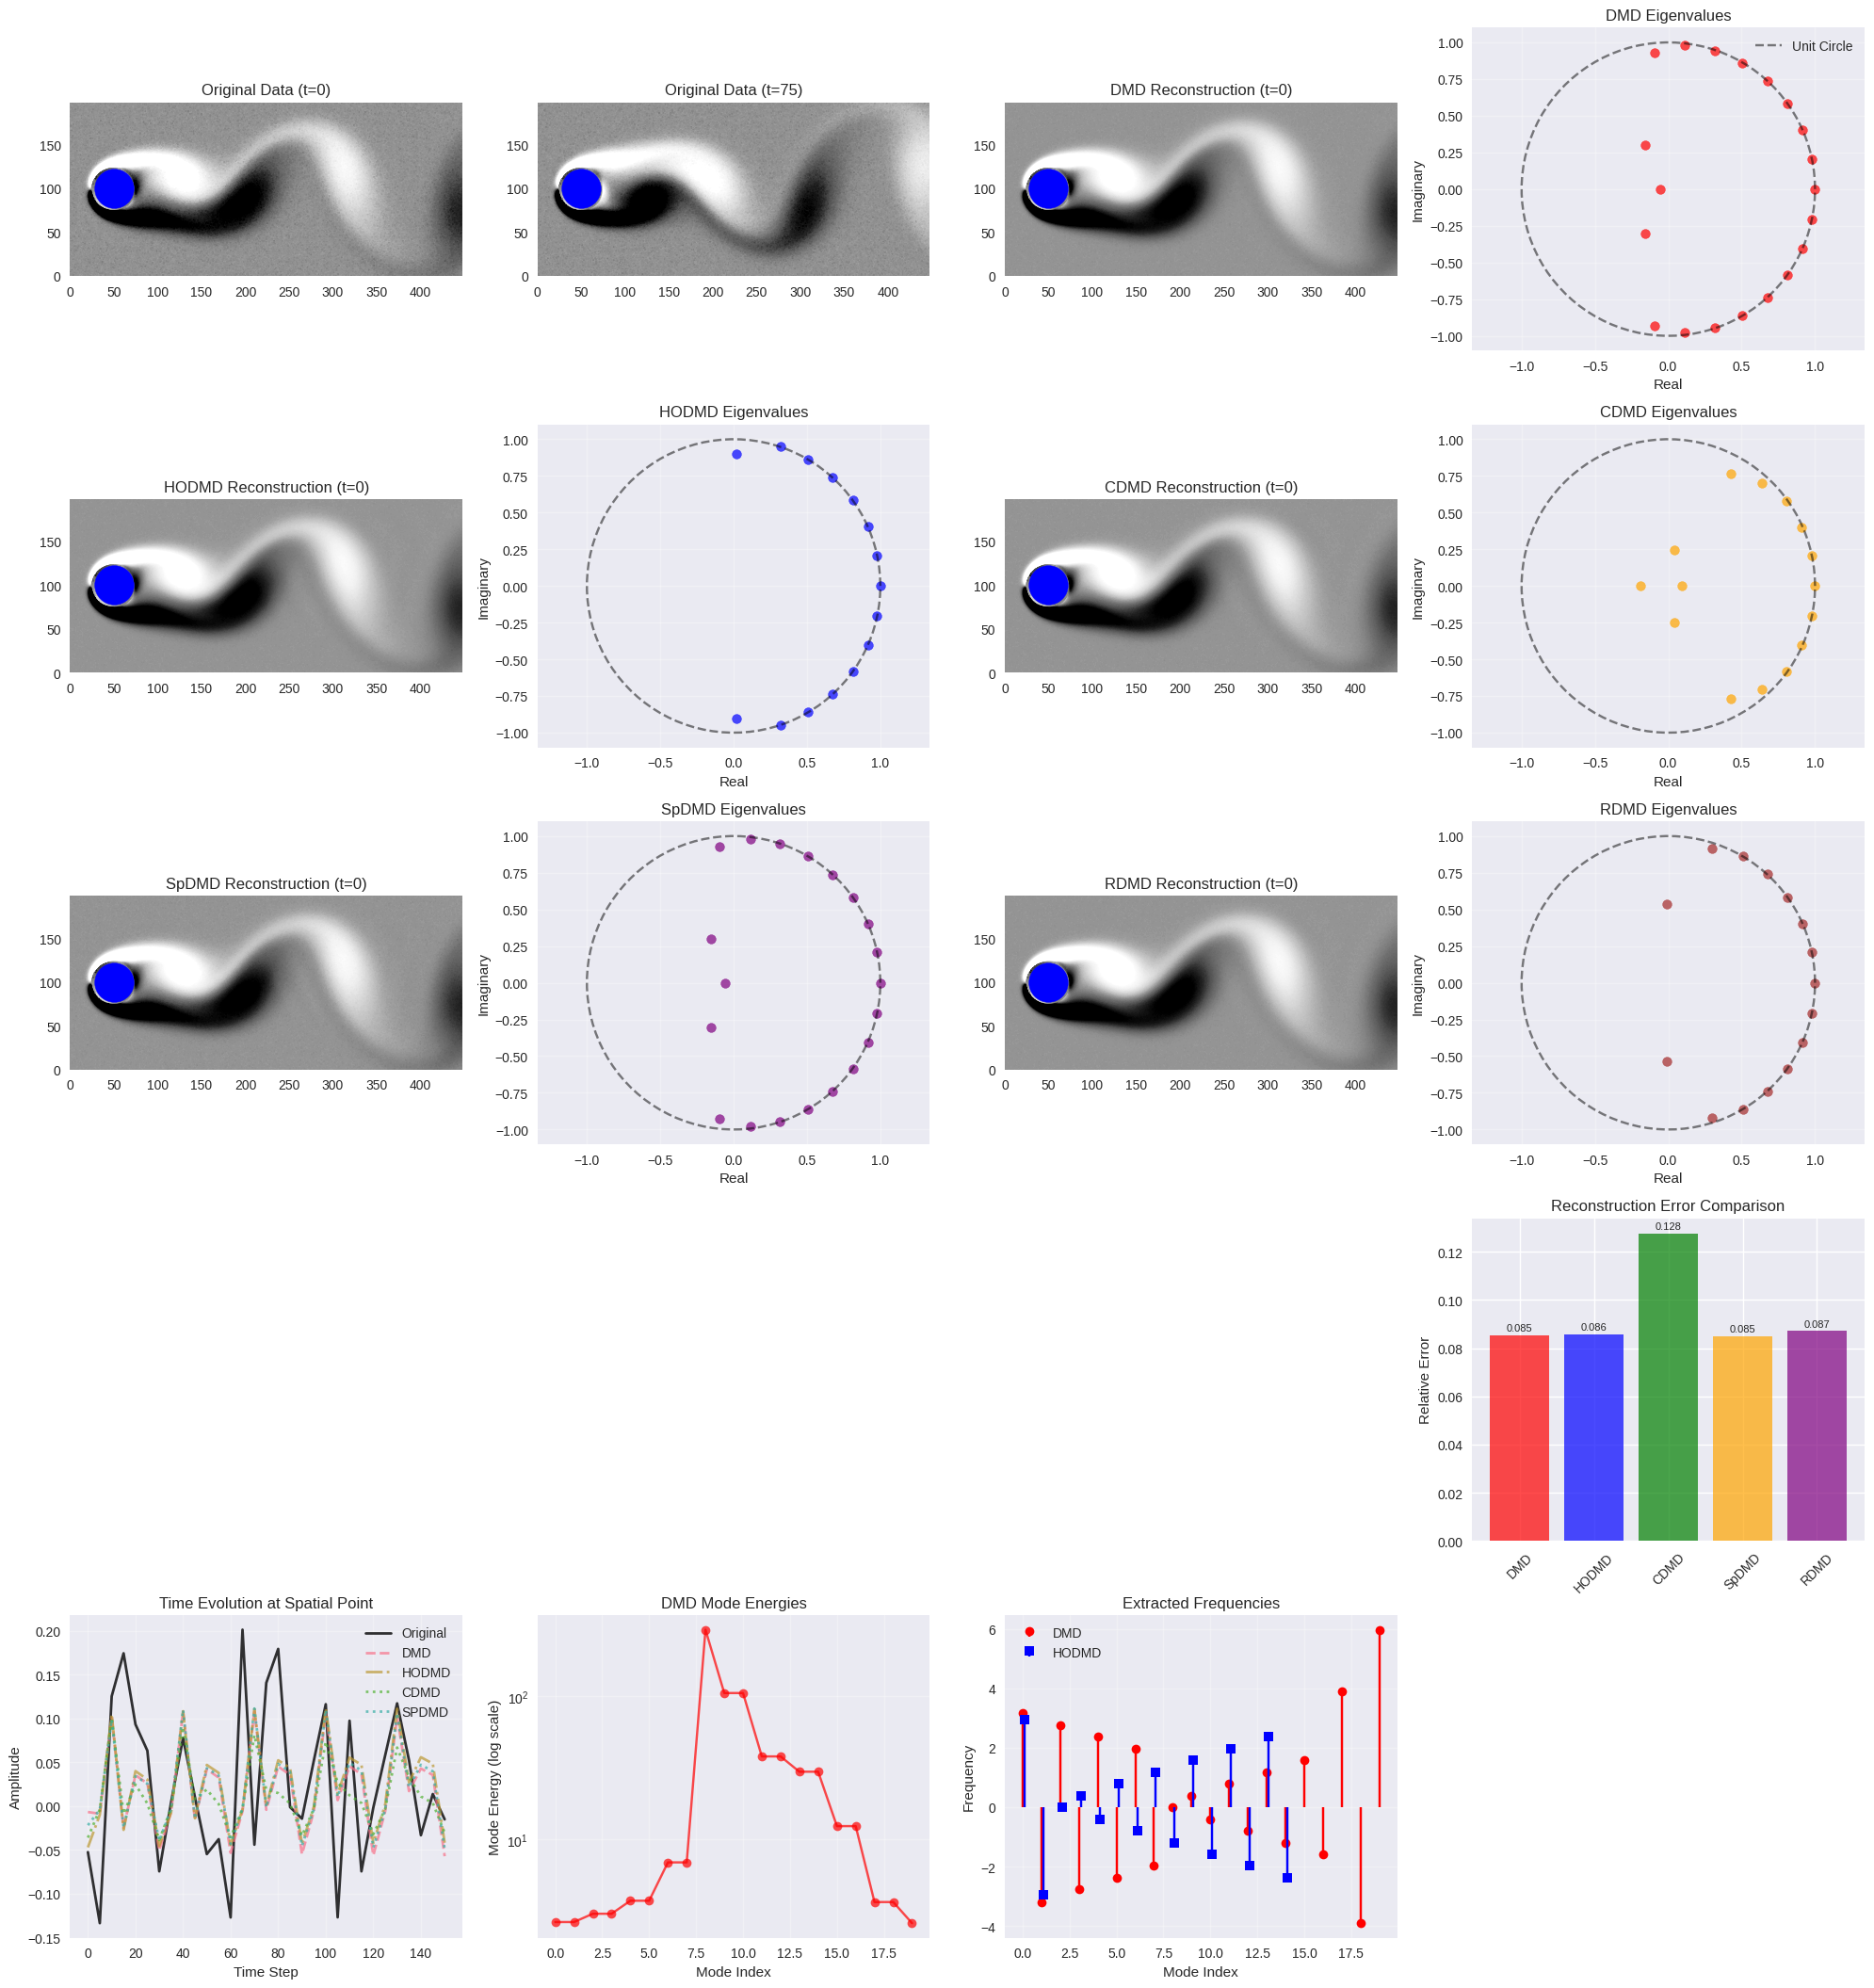

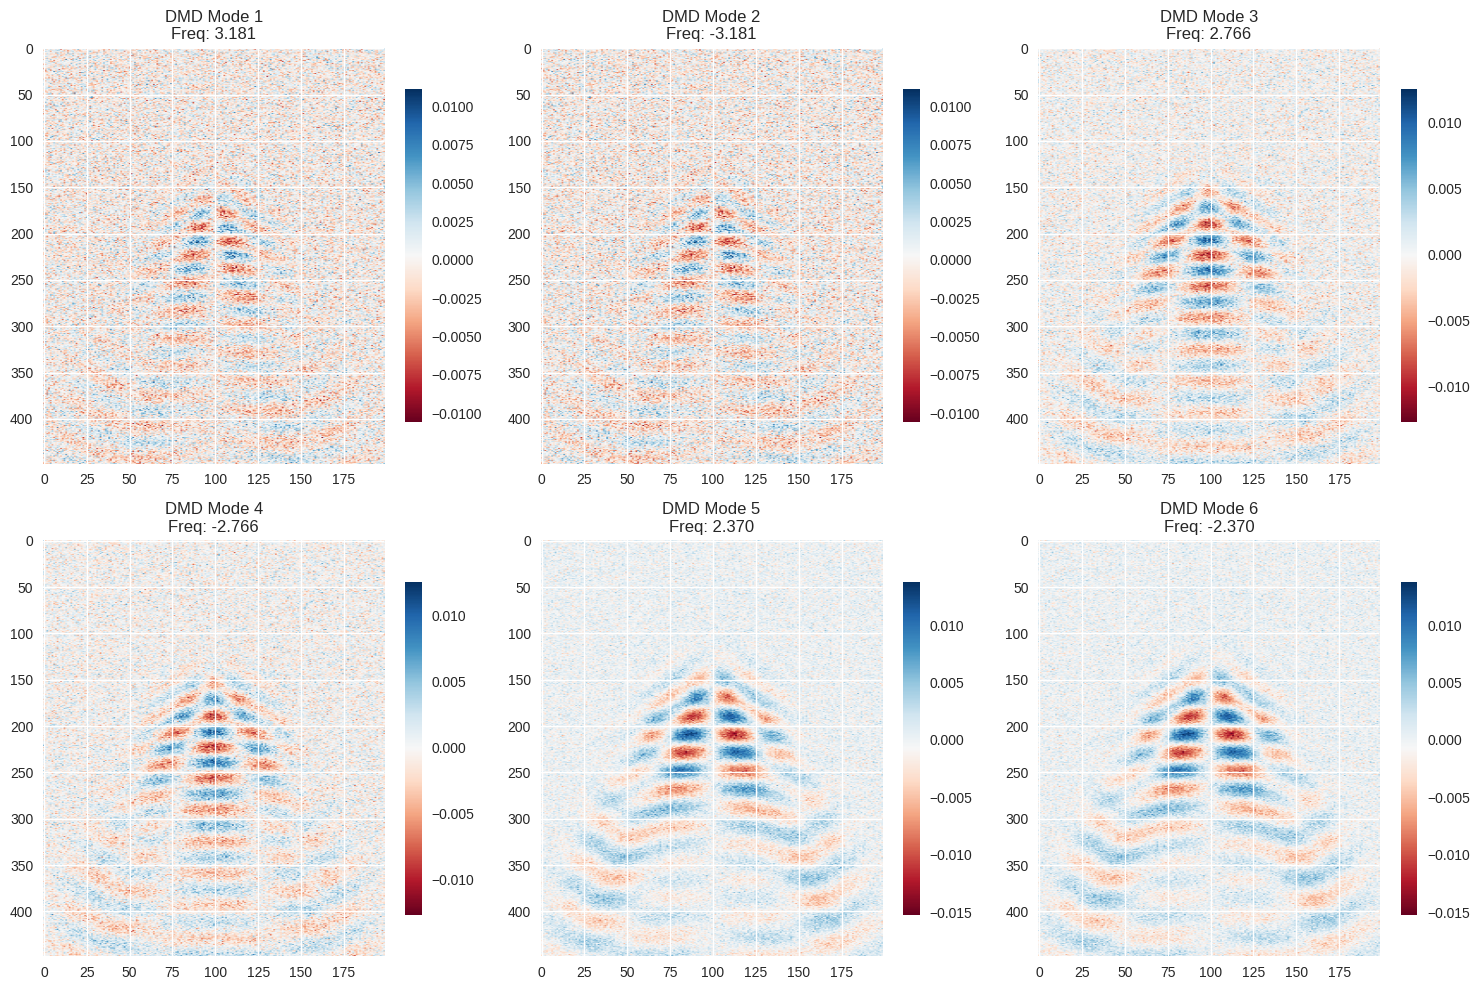


DMD ANALYSIS SUMMARY
Data shape: (89351, 151)
Time steps: 151
Spatial dimension: 89351
Reshaped spatial grid: 449 x 199

Reconstruction Errors:
DMD     : 0.085291
HODMD   : 0.085670
CDMD    : 0.127553
SpDMD   : 0.085016
RDMD    : 0.087184

Number of modes extracted:
DMD    : 20
HODMD  : 15
CDMD   : 15
SpDMD  : 20
RDMD   : 15

PyDMD Analysis Complete!


In [33]:

# Create figure for comprehensive analysis
fig = plt.figure(figsize=(20, 25))

# =============================================================================
# 1. STANDARD DMD
# =============================================================================
print("1. Performing Standard DMD...")
dmd = DMD(svd_rank=20)
dmd.fit(X)

# Plot original data samples
ax1 = plt.subplot(6, 4, 1)
ax1.contourf(np.real(np.reshape(X[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax1.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax1.set_aspect('equal')
plt.title('Original Data (t=0)')
plt.colorbar(im1, shrink=0.8)

ax2 = plt.subplot(6, 4, 2)
ax = ax2
ax.contourf(np.real(np.reshape(X[:,75],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
# im2 = plt.imshow(reshape_for_plot(X[:, 75]), cmap='RdBu', aspect='auto')
plt.title('Original Data (t=75)')
plt.colorbar(im2, shrink=0.8)

# DMD reconstruction
X_dmd = dmd.reconstructed_data
ax3 = plt.subplot(6, 4, 3)
ax = ax3
ax.contourf(np.real(np.reshape(X_dmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
# im3 = plt.imshow(reshape_for_plot(X_dmd[:, 0]), cmap='RdBu', aspect='auto')
plt.title('DMD Reconstruction (t=0)')
plt.colorbar(im3, shrink=0.8)

ax4 = plt.subplot(6, 4, 4)
# Plot DMD eigenvalues
theta = np.linspace(0, 2*np.pi, 100)
unit_circle = np.exp(1j * theta)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5, label='Unit Circle')
plt.scatter(np.real(dmd.eigs), np.imag(dmd.eigs), c='red', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('DMD Eigenvalues')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# =============================================================================
# 2. HIGHER ORDER DMD (HODMD)
# =============================================================================
print("2. Performing Higher Order DMD...")
hodmd = HODMD(svd_rank=15, d=5)
hodmd.fit(X)

ax5 = plt.subplot(6, 4, 5)
X_hodmd = hodmd.reconstructed_data
ax = ax5
ax.contourf(np.real(np.reshape(X_hodmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
# im5 = plt.imshow(reshape_for_plot(X_hodmd[:, 0]), cmap='RdBu', aspect='auto')
plt.title('HODMD Reconstruction (t=0)')
plt.colorbar(im5, shrink=0.8)

ax6 = plt.subplot(6, 4, 6)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(hodmd.eigs), np.imag(hodmd.eigs), c='blue', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('HODMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')



# =============================================================================
# 4. COMPRESSED DMD (CDMD)
# =============================================================================
print("4. Performing Compressed DMD...")
cdmd = CDMD(svd_rank=15, compression_matrix='sparse')
cdmd.fit(X)

ax9 = plt.subplot(6, 4, 7)
X_cdmd = cdmd.reconstructed_data
# im9 = plt.imshow(reshape_for_plot(X_cdmd[:, 0]), cmap='RdBu', aspect='auto')
ax = ax9
ax.contourf(np.real(np.reshape(X_cdmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
plt.title('CDMD Reconstruction (t=0)')
plt.colorbar(im9, shrink=0.8)

ax10 = plt.subplot(6, 4, 8)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(cdmd.eigs), np.imag(cdmd.eigs), c='orange', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('CDMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# =============================================================================
# 5. SPARSITY-PROMOTING DMD (SpDMD)
# =============================================================================
print("5. Performing Sparsity-Promoting DMD...")
spdmd = SpDMD(svd_rank=20, gamma=10, rho=1)
spdmd.fit(X)

ax11 = plt.subplot(6, 4, 9)
X_spdmd = spdmd.reconstructed_data
# im11 = plt.imshow(reshape_for_plot(X_spdmd[:, 0]), cmap='RdBu', aspect='auto')
ax=ax11
ax.contourf(np.real(np.reshape(X_spdmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
plt.title('SpDMD Reconstruction (t=0)')
plt.colorbar(im11, shrink=0.8)

ax12 = plt.subplot(6, 4, 10)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(spdmd.eigs), np.imag(spdmd.eigs), c='purple', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('SpDMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# =============================================================================
# 6. RANDOMIZED DMD (RDMD)
# =============================================================================
print("6. Performing Randomized DMD...")
rdmd = RDMD(svd_rank=15)
rdmd.fit(X)

ax13 = plt.subplot(6, 4, 11)
X_rdmd = rdmd.reconstructed_data
# im13 = plt.imshow(reshape_for_plot(X_rdmd[:, 0]), cmap='RdBu', aspect='auto')
ax=ax13
ax.contourf(np.real(np.reshape(X_rdmd[:,0],(449,199))).T, levels = 1001, vmin=-2, vmax=2)
ax.scatter(50,100,900,color='Blue', zorder=2) # draw cylinder
ax.set_aspect('equal')
plt.title('RDMD Reconstruction (t=0)')
plt.colorbar(im13, shrink=0.8)

ax14 = plt.subplot(6, 4, 12)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', alpha=0.5)
plt.scatter(np.real(rdmd.eigs), np.imag(rdmd.eigs), c='brown', s=50, alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('RDMD Eigenvalues')
plt.grid(True, alpha=0.3)
plt.axis('equal')



# =============================================================================
# 8. Error Analysis
# =============================================================================
ax16 = plt.subplot(6, 4, 16)
methods = ['DMD', 'HODMD', 'CDMD', 'SpDMD', 'RDMD']
reconstructions = [X_dmd, X_hodmd,  X_cdmd, X_spdmd, X_rdmd]
errors = []

for recon in reconstructions:
    error = np.linalg.norm(X - recon, 'fro') / np.linalg.norm(X, 'fro')
    errors.append(error)

bars = plt.bar(methods, errors, color=['red', 'blue', 'green', 'orange', 'purple', 'brown'], alpha=0.7)
plt.ylabel('Relative Error')
plt.title('Reconstruction Error Comparison')
plt.xticks(rotation=45)
for i, (bar, error) in enumerate(zip(bars, errors)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{error:.3f}', ha='center', va='bottom', fontsize=8)

# =============================================================================
# 9. Time Evolution Comparison
# =============================================================================
ax15 = plt.subplot(6, 4, 17)
# Select a point in space for time series comparison
point_idx = 44000  # Middle point
time_idx = np.arange(0, 151, 5)  # Sample every 5th time step

plt.plot(time_idx, X[point_idx, time_idx], 'k-', linewidth=2, label='Original', alpha=0.8)
plt.plot(time_idx, X_dmd[point_idx, time_idx], '--', linewidth=2, label='DMD', alpha=0.7)
plt.plot(time_idx, X_hodmd[point_idx, time_idx], '-.', linewidth=2, label='HODMD', alpha=0.7)
plt.plot(time_idx, X_cdmd[point_idx, time_idx], ':', linewidth=2, label='CDMD', alpha=0.7)
plt.plot(time_idx, X_spdmd[point_idx, time_idx], ':', linewidth=2, label='SPDMD', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.title('Time Evolution at Spatial Point')
plt.legend()
plt.grid(True, alpha=0.3)

# =============================================================================
# 10. Mode Energy Analysis
# =============================================================================
ax8 = plt.subplot(6, 4, 18)
# Analyze mode energies for DMD
mode_energies = np.abs(dmd.amplitudes)
mode_indices = np.arange(len(mode_energies))

plt.semilogy(mode_indices, mode_energies, 'o-', color='red', alpha=0.7)
plt.xlabel('Mode Index')
plt.ylabel('Mode Energy (log scale)')
plt.title('DMD Mode Energies')
plt.grid(True, alpha=0.3)

# =============================================================================
# 11. Frequency Analysis
# =============================================================================
ax7 = plt.subplot(6, 4, 19)
# Extract frequencies from eigenvalues
dt = time[1] - time[0]
frequencies_dmd = np.angle(dmd.eigs) / (2 * np.pi * dt)
frequencies_hodmd = np.angle(hodmd.eigs) / (2 * np.pi * dt)

plt.stem(np.arange(len(frequencies_dmd)), frequencies_dmd, linefmt='r-', markerfmt='ro', 
         basefmt=' ', label='DMD')
plt.stem(np.arange(len(frequencies_hodmd))+0.1, frequencies_hodmd, linefmt='b-', markerfmt='bs', 
         basefmt=' ', label='HODMD')

plt.xlabel('Mode Index')
plt.ylabel('Frequency')
plt.title('Extracted Frequencies')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ADDITIONAL ANALYSIS PLOTS
# =============================================================================

# Create a separate figure for mode visualization
fig2, axes = plt.subplots(2, 3, figsize=(15, 10))

# Visualize first few DMD modes
for i in range(6):
    ax = axes[i//3, i%3]
    if i < len(dmd.modes.T):
        mode_2d = reshape_for_plot(np.real(dmd.modes[:, i]))
        im = ax.imshow(mode_2d, cmap='RdBu', aspect='auto')
        ax.set_title(f'DMD Mode {i+1}\nFreq: {frequencies_dmd[i]:.3f}')
        plt.colorbar(im, ax=ax, shrink=0.8)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("DMD ANALYSIS SUMMARY")
print("="*50)
print(f"Data shape: {X.shape}")
print(f"Time steps: {n_snapshots}")
print(f"Spatial dimension: {spatial_dim}")
print(f"Reshaped spatial grid: 449 x 199")

print(f"\nReconstruction Errors:")
for method, error in zip(methods, errors):
    print(f"{method:8}: {error:.6f}")

print(f"\nNumber of modes extracted:")
print(f"DMD    : {len(dmd.eigs)}")
print(f"HODMD  : {len(hodmd.eigs)}")

print(f"CDMD   : {len(cdmd.eigs)}")
print(f"SpDMD  : {len(spdmd.eigs)}")
print(f"RDMD   : {len(rdmd.eigs)}")

# Function to predict future states
def predict_future(dmd_model, n_future_steps=50):
    """Predict future states using DMD model"""
    current_time_step = dmd_model.original_time['t0'] + len(dmd_model.original_time['tend']) * dmd_model.original_time['dt']
    future_time = np.arange(current_time_step, 
                           current_time_step + n_future_steps * dmd_model.dmd_time['dt'], 
                           dmd_model.dmd_time['dt'])
    
    # Extend DMD time
    dmd_model.dmd_time = np.concatenate([dmd_model.dmd_time, future_time])
    return dmd_model.reconstructed_data

print(f"\nPyDMD Analysis Complete!")
print("="*50)